In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])

In [2]:
# X and y
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)
random.seed(1234)

# **Exercise 1** (10 points)
Read pages 227-233 from the attached pdf file.

(a) Briefly explain what are the differences between gradient descent, gradient descent with
momentum, and stochastic gradient descent.

## **Explaination**
- **Gradient Descent:**

GD as know as the batch Gradient Descent, is a first-order optimization algorithm. It employs gradient descent to try to find a local minimum of a given function. It begins by initializing the parameters with some random numbers and then proceeds in the steepest downward direction one step at a time. The steeper the slope, and the faster a model can learn, the higher the gradient. The model, however, stops learning if the slope is zero. A gradient is a partial derivative of its inputs in mathematical terminology.

Gradient Descent produces a solid error gradient and a stable convergence. However, the downside of Gradient Descent is that we need to compute the gradient for just one update by using the whole training dataset, which wastes in a computer memory. 

The equation below describes what gradient descent does: $X_{i} + 1$ is the next position, while $X_{i}$ represents the current position. The minus sign refers to the minimization part of gradient descent. The gamma in the middle is a waiting factor and the gradient term ($\nabla f$) is simply the direction of the steepest descent. So this formula basically tells us the next position we need to go, which is the direction of the steepest descent. However, if the step-size is too small, gradient descent can be slow. If the step-size is chosen too large, gradient descent can overshoot.

$$
X_{i} + 1 = X_{i} - \gamma_{i}((\nabla f)(X_{i}))^{T}
$$

- **Gradient descent with Momentum**

We also can utilize the element of momentum to our batch Gradient Descent. We can add on the movement from the previous step in the Gradient Descent. The momentum-based method remembers the update $\Delta x_i$ at each iteration $i$ and determines the next update as a linear combination of the current and previous gradients, the following formula is:

$$
X_{i} + 1 = X_{i} - \gamma_{i}((\nabla f)(X_{i}))^{T} + \alpha \Delta X_i
$$

where $\alpha \in [0, 1]$, we will only know the gradient approximately. In short, we can say the Gradient descent with Momentum is that we take a basic GD and add previous delta times decay rate in each iteration. Thus, because of all the momentum are accumulated, GD with Momentum moves faster than GD, but GD with Momentum may propel it out of a local minimum. 

- **Stochastic Gradient Descent (SGD)** 

SGD is a stochastic approximation of the gradient descent method for minimizing an objective function written as a sum of differentiable functions. Because a Gradient Descent uses the full training set to update the parameters, a SGD would be faster than a Gradient Descent because it only uses one or a subset of training samples from the training set to update a parameter in a given iteration. 

When compared to Gradient Descent, SGD frequently converges considerably faster, however the error function is not as well minimized as in GD. In most circumstances, the close approximation that we get in SGD for the parameter values are enough because the algorithm reach the optimal values and keep oscillating there.



#**Coding Session**

(b) Using the given Python code for stochastic gradient descent (SGD), write a script to compare SGD and the gradient descent algorithm that was demonstrated during lecture. For both algorithms, use the same cost function and by starting with an initial guess from a Gaussian distribution, and by using 1000 iterations and a learning rate of 0.01, **compare stochastic gradient descent and gradient descent** in terms of convergence speed
and accuracy. Try different learning rate and discuss your results. Demonstrate your results using figures like we did in class.

In [3]:
# define cost function
def calculate_cost(theta, X, y):
    '''
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''  
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

## Gradient Descent

In [4]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = calculate_cost(theta,X,y)
        
    return theta, cost_history, theta_history

Start with an initial guess from a Gaussian distribution by 1000 iterations and 0.01 learning rate

[[ 1.15632397]
 [-0.33550937]]


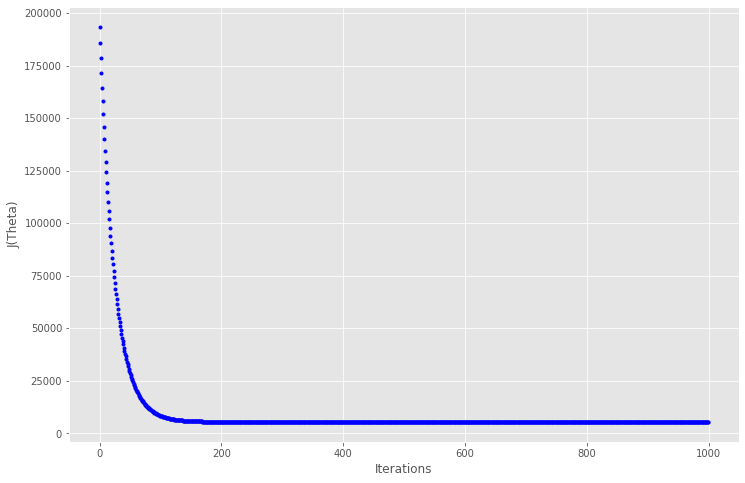

In [5]:
learning_rate = 0.01
n_iter = 1000

theta = np.random.randn(2, 1) # standard normal distribution
print(theta)
X_b = np.c_[np.ones((len(X),1)),X]
#print(X_b)
theta, cost_history, theta_history = gradient_descent(X_b, y, theta, learning_rate, n_iter)

fig, ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

In [6]:
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.326,
Theta1:          2.671
Final cost/MSE:  5344.919


### Let's zoom in until iteration 200. Because the rest are almost a flatten line.

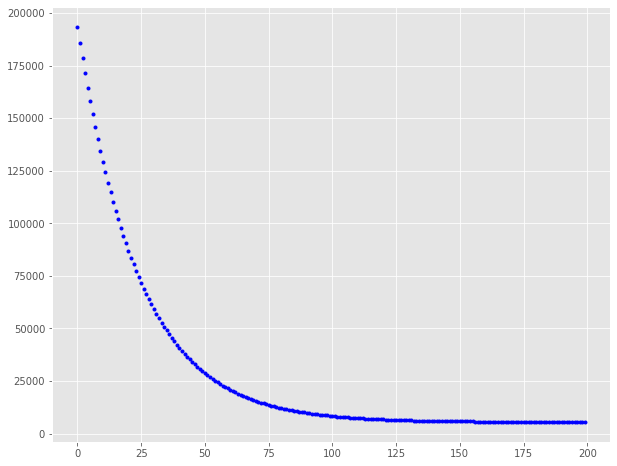

In [7]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

### Define a function that combines the effects and demonstrates how gradient descent works.

In [8]:
def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

### Change the different iterations and learning rate to visualize the outcome.

Learning rate is important, because if the step is taking to big, it may not reach the local minimum. Because it bounces back and forth between the convex function of gradient descent. Conversely, if the step is taking to small, it may take too much time to find the local minimum. Thus, we can check the suitable learning rate plotting the x-axis of the iteration and the y-axis of the cose function. 

In this session, we discover that a larger learning rate and fewer iterations can allow the cost function to quickly attain its lowest value. The plot of 150 iterations with a 0.1 learning rate outperforms the others.

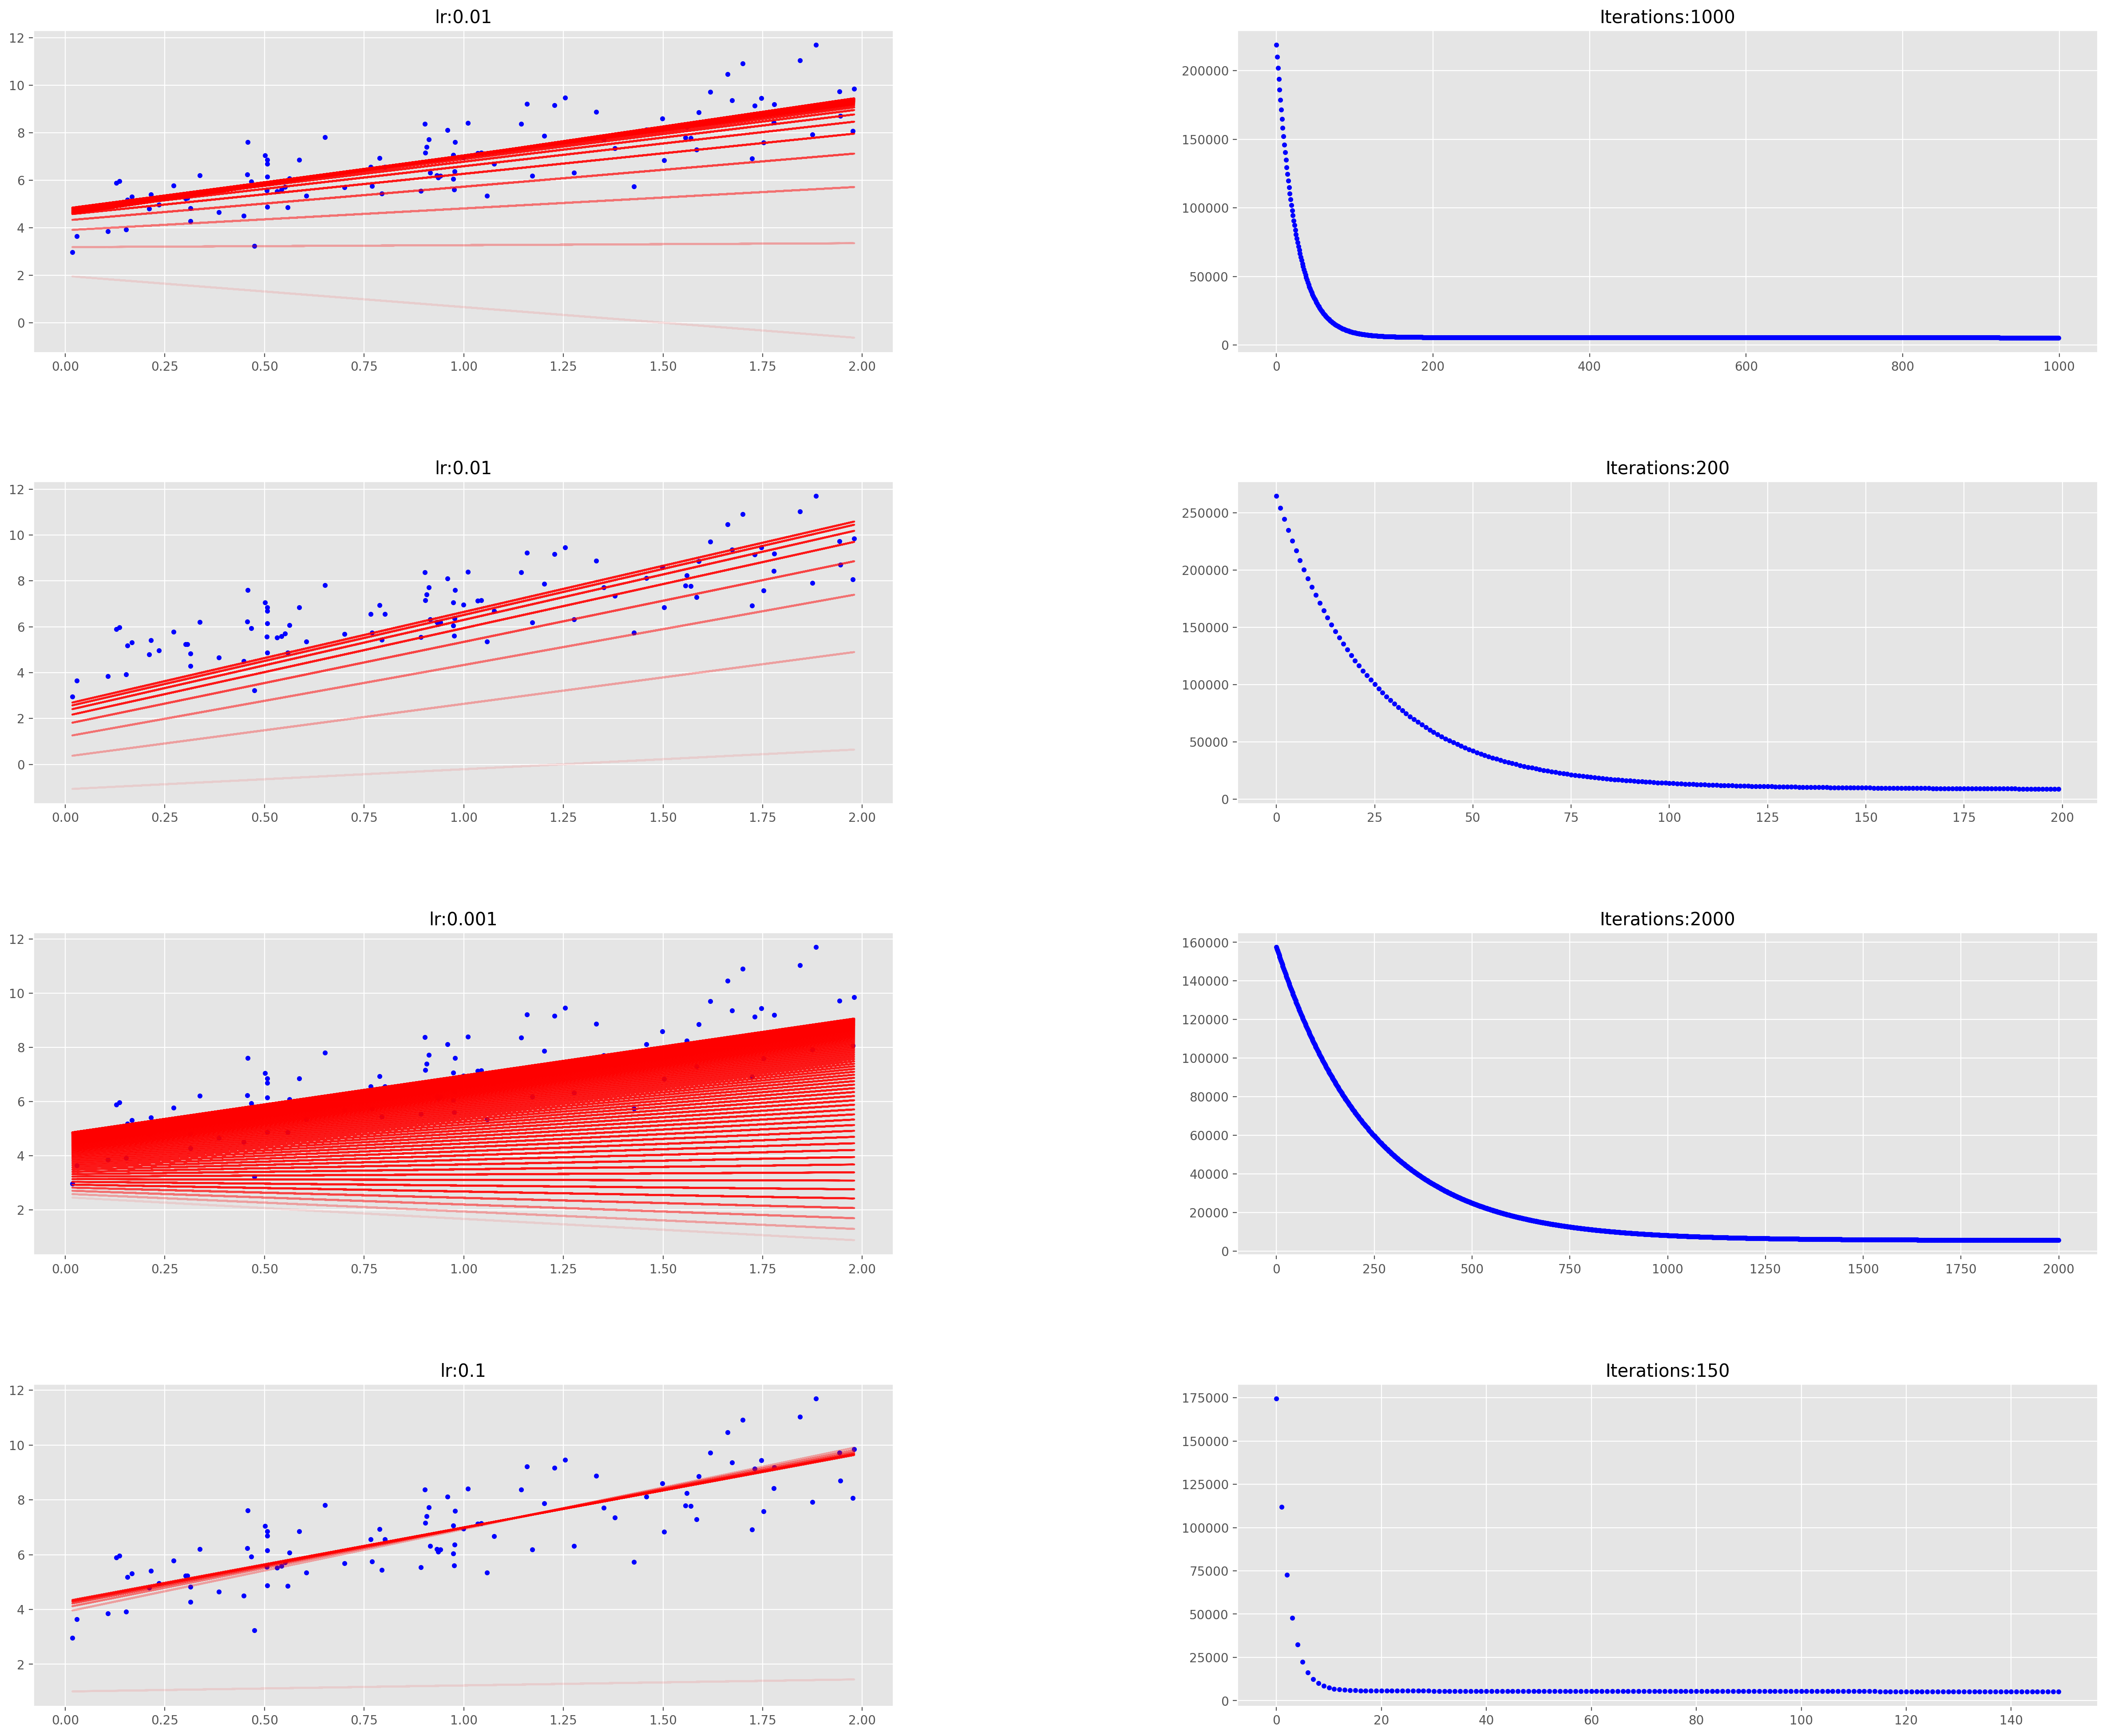

In [9]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace = 0.4)

it_lr =[(1000, 0.01), (200, 0.01), (2000, 0.001), (150, 0.1)] # literation, learning rate
count =0
for n_iter, lr in it_lr:
  count += 1

  ax = fig.add_subplot(4, 2, count)
  count += 1

  ax1 = fig.add_subplot(4, 2,count)

  ax.set_title("lr:{}".format(lr))
  ax1.set_title("Iterations:{}".format(n_iter))
  plot_GD(n_iter,lr,ax,ax1)

## Stochastic Gradient Descent (SGD)



In [10]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += calculate_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

### Start with an initial guess from a Gaussian distribution by 1000 iterations and 0.01 learning rate. Then, plot the outcome

On GD and SGD, we use the same iterations = 1000 and learning rate = 0.01. The final cost is around 5500 in GD, and the final cost is around 65 in SGD. For this example, SGD definitely outperforms GD in this example because SGD can sufficiently minimize the objective function. 

Theta0:          4.461,
Theta1:          2.548
Final cost/MSE:  57.090


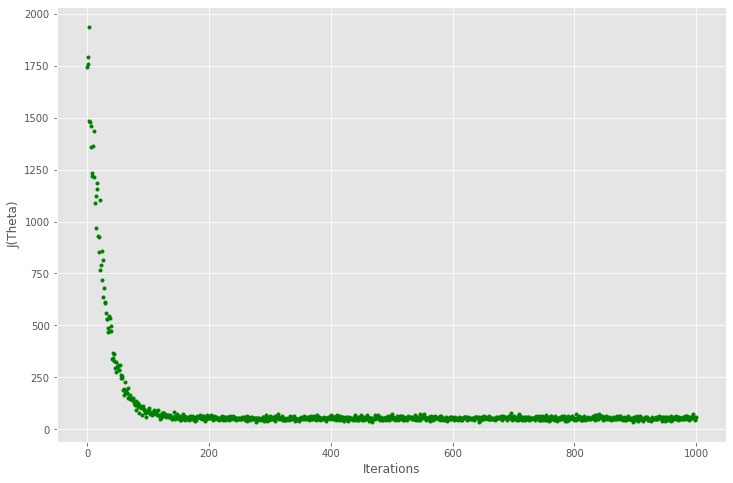

In [11]:
lr =0.01
n_iter = 1000
theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X),1)),X]
# theta, cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)
theta, cost_history = stocashtic_gradient_descent(X_b, y, theta, lr, n_iter)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter), cost_history,'g.')

Let's zoom in until iteration 200. Because the rest are almost a flatten line.

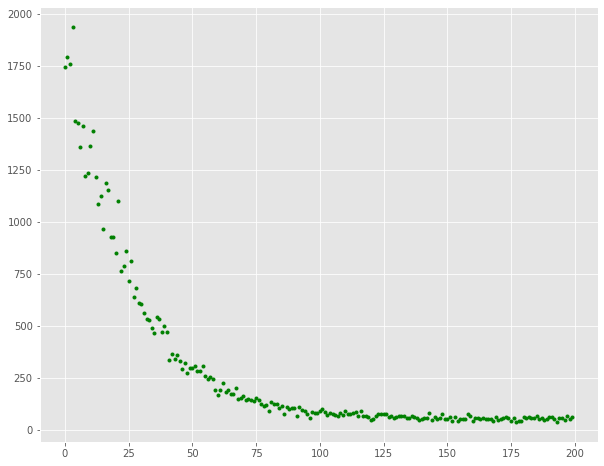

In [12]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'g.')

### Define a function that combines the effects and demonstrates how SGD works

Similarly, if we set the learning rate to 0.1 and the iteration to 150, SGD would be rapidly descented. Also, the combination could decrease the use of RAM.

Text(0.5, 1.0, 'SGD with 1000 iterations and 0.01 learning rate')

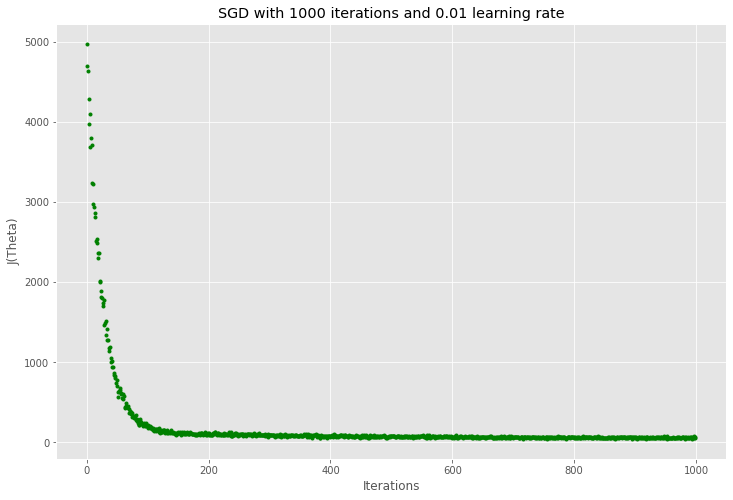

In [13]:
def plot_SGD(lr, n_iter):
  theta = np.random.randn(2,1)
  X_b = np.c_[np.ones((len(X),1)),X]
  # theta, cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)
  theta, cost_history = stocashtic_gradient_descent(X_b, y, theta, lr, n_iter)

  fig,ax = plt.subplots(figsize=(12,8))
  ax.set_ylabel('J(Theta)')
  ax.set_xlabel('Iterations')
  _=ax.plot(range(n_iter), cost_history,'g.')

plot_SGD(0.01, 1000)
plt.title("SGD with 1000 iterations and 0.01 learning rate")

Text(0.5, 1.0, 'SGD with 200 iterations and 0.01 learning rate')

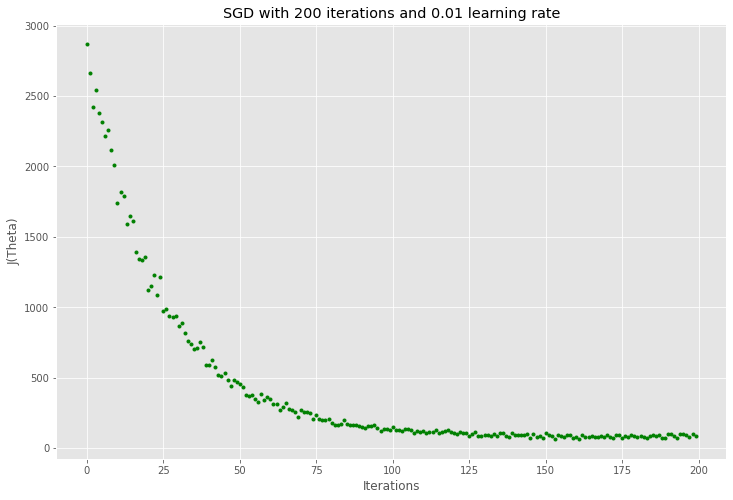

In [14]:
# it_lr =[(1000, 0.01), (200, 0.01), (2000, 0.001), (150, 0.1)]
plot_SGD(0.01, 200)
plt.title("SGD with 200 iterations and 0.01 learning rate")

Text(0.5, 1.0, 'SGD with 2000 iterations and 0.001 learning rate')

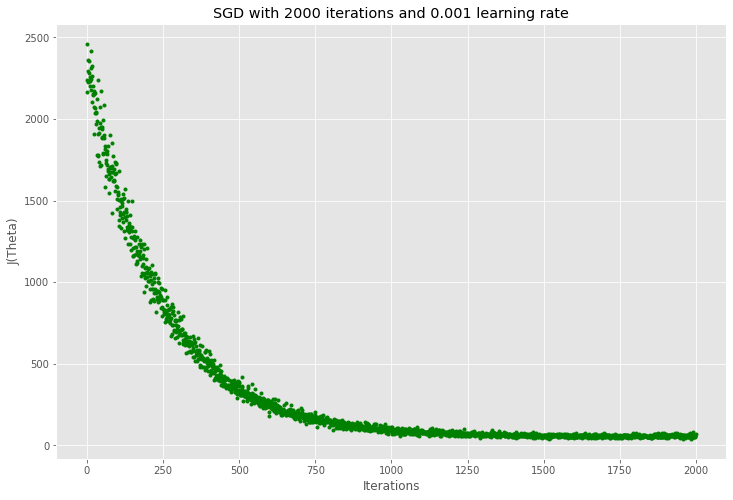

In [15]:
plot_SGD(0.001, 2000)
plt.title("SGD with 2000 iterations and 0.001 learning rate")

Text(0.5, 1.0, 'SGD with 150 iterations and 0.1 learning rate')

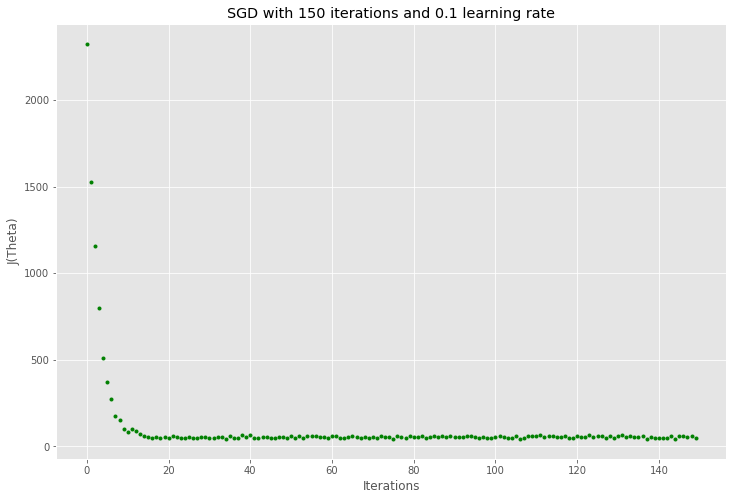

In [16]:
plot_SGD(0.1, 150)
plt.title("SGD with 150 iterations and 0.1 learning rate")

# References
-  *Pages 227-233* from the pdf file.
-  https://datascience.stackexchange.com/questions/36450/what-is-the-difference-between-gradient-descent-and-stochastic-gradient-descent
- https://builtin.com/data-science/gradient-descent
- https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d
- https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c
- https://ruder.io/optimizing-gradient-descent/index.html#parallelizinganddistributingsgd


